# vdw equation of state

Plot the vdw isotherms for CO2 above and below the critical temperature (about 305 K).

Text(0, 0.5, 'Pressure / bar')

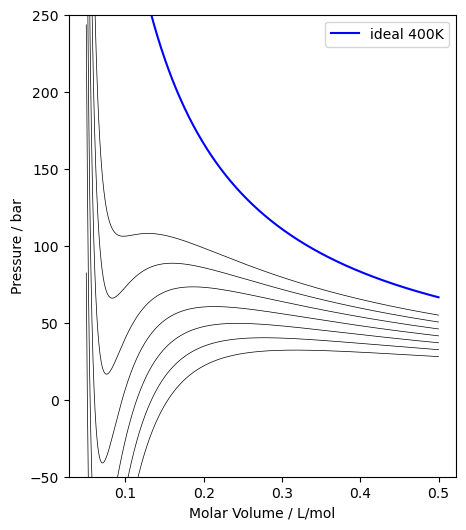

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def ideal(Vm, T):
    "Pressure of ideal gas as function of molar volume Vm at T"
    R = 0.08314  # L bar/mol K
    return R*T/Vm

def vdw(Vm, a, b, T):
    "van der Waals pressure of gas as a function of molar volume Vm and a, b parameters at T"
    R = 0.08314  # L bar / mol K  
    return R*T/(Vm - b) - (a/Vm**2)

vm = np.linspace(0.05, 0.5, 1000) # L; molar volume 

# CO2 parameters; Boyle temp = 352K
# https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)
ab = [3.640, 0.04267] # L bar/mol^2; L bar/mol
#ab = [0.0346, 0.023] # He vdw constants
ab = [0.208, 0.0167] # Ne vdw constants
ab = [4.225, 0.0371] # NH3 vdw constants

plt.figure(figsize=[5,6])
for T in range(250, 401, 25):
    plt.plot(vm, vdw(vm, *ab, T), lw=.5, color='k')
plt.ylim(-50,250)
plt.plot(vm, ideal(vm, 400), color='b', label="ideal 400K")
plt.legend()
plt.xlabel("Molar Volume / L/mol")
plt.ylabel("Pressure / bar")

Critical temp for CO2 is 305 K. At $T_c$, there will be an inflection point. Above $T_c$ there is only one volume value for a pressure.  Physically, above $T_c$ no gas-liquid interface is observed; material behaves as *fluid*.

Thinking about the data for the vdw equation of state:
- Why do the vdw isotherms have the shape they do? (Solve/set vdw equation to zero)
- What are the physical interpretations for the vdw a and b constants?
- Where does the model give physically useful/unuseful information?
- What is the Maxwell construction?

# Compression factor

The compression factor for a gas is defined as

$$Z = \frac{PV_m}{RT}$$

CTQ: What is the value of Z for an ideal gas?

CTQ: What does a plot of Z vs P for an ideal gas look like?

CTQ: What about a real gas?

**Exercise:**

Generate a plot of Z vs P for nitrogen at 200K and 400K.  You can choose either the vdw or RK equation of state. Next, do the same thing for another gas in ER3 Appendix Table 7.4. In about a paragraph, explain the similarities and differences between the plot of your gas and the plot from nitrogen. Hint: Use the a, b parameters and molecular structure in your discussion.

(0.7, 1.5)

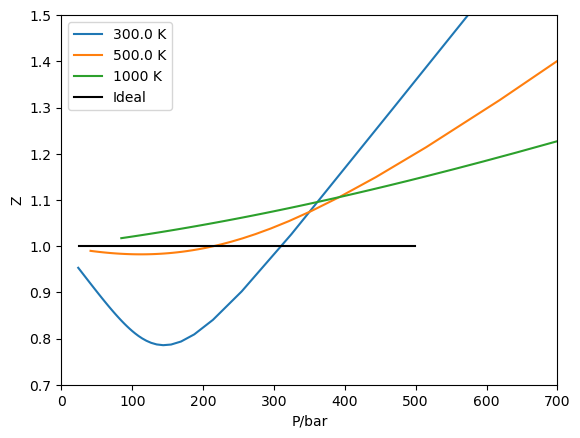

In [2]:
R = 0.0831 # L bar / mol K
Ts = [300., 500., 1000] # K
V = np.linspace(0.05, 1, 100)  # L  molar volume

# methane vdW constants
a= 2.283
b= 0.04278  # from wikipedia

# using ideal EOS; though we can predict what this should be
# Ts[0] is the first element of Ts
Pid = R*Ts[0]/V
Zid = Pid*V / (R * Ts[0])

# plot vdW isotherms
for T in Ts:
    # using vdW EOS
    Pvdw = (R*T)/(V-b) - (a/V**2)
    Zvdw = Pvdw *(V / (R*T))
    plt.plot(Pvdw, Zvdw, label="%s K"%T)
plt.plot(Pid, Zid, "k", label="Ideal")
plt.legend()
plt.xlabel("P/bar"); plt.ylabel("Z")
plt.xlim(0,700); plt.ylim(.7, 1.5)